# PCA for PF Construction

In [1]:
from sklearn.decomposition import PCA
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../app"))
from frame import Frame
data = Frame()
df = data.dataset()

Fetching and Merging...
Merging completed successfully!
Started prepocessing....


/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  df_modified['source_file'] = df_modified['source_file'].str.split('/').str[-1].str.replace('.csv', '')
/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.drop(columns=['HLN'],inplace=True)
/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.fillna(method='ffill', inplace=True)


Completed prepocessing.
Fetching and Merging...
Merging completed successfully!
Started prepocessing....


/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  df_modified['source_file'] = df_modified['source_file'].str.split('/').str[-1].str.replace('.csv', '')


Completed prepocessing.


/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.drop(columns=['HLN'],inplace=True)
/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.fillna(method='ffill', inplace=True)


In [4]:
df.set_index('date', inplace=True)


In [5]:
df

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,157.0,3330.5,1956.0,3051.0,5300.0,992.0,1361.5,675.6,434.6998,8509.0,...,2903.0,300.00,151.50,3749.0,1041.0,1082.5,127.96,1743.5,1161.0,3083.0
2022-02-02,160.0,3321.5,1959.5,3080.0,5390.0,1000.0,1284.0,692.0,437.3998,8582.0,...,2933.0,302.00,153.95,3782.5,1054.0,1083.0,132.32,1762.0,1178.5,3054.0
2022-02-03,156.8,3316.0,1940.5,3012.0,5158.0,982.0,1258.5,661.2,439.8998,8358.0,...,2872.0,297.05,152.40,3803.5,1040.5,1063.5,133.58,1725.0,1161.5,3005.0
2022-02-04,155.0,3322.5,1884.5,2959.0,5008.0,978.0,1227.0,654.0,435.1998,8282.0,...,2832.0,295.55,149.35,3815.0,1014.5,1035.0,134.22,1676.0,1183.5,2968.0
2022-02-07,155.0,3383.0,1910.5,2999.0,4939.0,986.0,1233.5,654.0,439.2998,8348.0,...,2795.0,291.40,150.10,3858.5,1004.5,1032.5,137.40,1677.0,1172.0,3016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,141.3,2301.0,1851.0,2891.0,4404.0,1216.0,1710.0,780.4,533.8000,12064.0,...,2512.0,388.70,111.70,4617.0,827.0,976.2,69.82,2344.0,618.6,2526.0
2025-03-05,142.2,2408.0,1853.5,2901.0,4526.0,1214.0,1820.5,772.0,541.8000,12062.0,...,2399.0,379.00,111.55,4538.0,813.5,944.4,69.54,2440.0,610.2,2547.0
2025-03-06,142.7,2462.5,1897.0,3046.0,4575.0,1220.0,1863.5,775.4,535.8000,12028.0,...,2370.0,375.90,110.20,4538.0,792.5,949.0,69.60,2480.0,630.6,2531.0


In [8]:
# Create log returns to remove stationarity
log_returns = np.log(df / df.shift(1))

# Drop NaN values caused by the shift
log_returns = log_returns.dropna().drop(columns="FTSE100")

In [9]:
# Creating X of the closing prices (absolute prices)
X_abs = df.drop(columns="FTSE100").dropna()
stock_features = X_abs.columns
X_abs.shape

(786, 99)

In [10]:
# Creating X of the closing prices (log returns)
X_log = log_returns.copy()
stock_log_features = X_log.columns
X_log.shape

(785, 99)

In [11]:
# Preprocessing ABS (data must be centered around its mean before PCA)
scaler = StandardScaler()
scaler.fit(X_abs)
X_abs = pd.DataFrame(scaler.transform(X_abs), columns=stock_features)
X_abs

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
0,2.246578,1.259917,-0.143045,2.083012,0.422662,-0.698920,-0.806451,-0.023926,-0.153449,-2.712165,...,1.242932,0.310040,1.338321,-1.032139,0.941641,0.866546,1.884378,-0.435369,3.096827,0.223654
1,2.439685,1.244135,-0.132943,2.181218,0.577161,-0.632853,-1.069739,0.140983,-0.081135,-2.630913,...,1.393649,0.354911,1.471781,-0.940145,1.090638,0.875558,2.086634,-0.357264,3.259072,0.134450
2,2.233704,1.234490,-0.187782,1.950942,0.178897,-0.781504,-1.156369,-0.168723,-0.014177,-2.880235,...,1.087192,0.243856,1.387347,-0.882477,0.935911,0.524119,2.145084,-0.513474,3.101463,-0.016272
3,2.117840,1.245888,-0.349413,1.771461,-0.078601,-0.814538,-1.263383,-0.241122,-0.140057,-2.964826,...,0.886237,0.210203,1.221203,-0.850897,0.637917,0.010479,2.174773,-0.720346,3.305427,-0.130083
4,2.117840,1.351984,-0.274370,1.906918,-0.197051,-0.748471,-1.241301,-0.241122,-0.030247,-2.891365,...,0.700353,0.117097,1.262058,-0.731441,0.523304,-0.034577,2.322291,-0.716124,3.198809,0.017564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1.235982,-0.545459,-0.446103,1.541185,-1.115461,1.150970,0.377496,1.029880,2.500763,1.244698,...,-0.721407,2.300045,-0.829722,1.351471,-1.511079,-1.049243,-0.812684,2.099868,-1.931825,-1.489662
782,1.293914,-0.357819,-0.438888,1.575049,-0.906029,1.134453,0.752894,0.945414,2.715028,1.242472,...,-1.289106,2.082423,-0.837893,1.134529,-1.665807,-1.622358,-0.825673,2.505168,-2.009703,-1.425067
783,1.326099,-0.262245,-0.313335,2.066080,-0.821913,1.184003,0.898977,0.979603,2.554329,1.204628,...,-1.434799,2.012874,-0.911432,1.134529,-1.906494,-1.539454,-0.822890,2.674043,-1.820572,-1.474282
784,1.499896,-0.404290,-0.257053,1.883213,-0.923195,1.051868,0.834429,1.049991,2.543616,1.253602,...,-1.319250,2.107102,-0.701709,1.324010,-1.814804,-1.373647,-0.688362,2.657156,-1.748257,-1.526574


In [12]:
# Preprocessing LOG (data must be centered around its mean before PCA)
scaler.fit(X_log)
X_log = pd.DataFrame(scaler.transform(X_log), columns=stock_log_features, index=log_returns.index)
X_log

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,0.910857,-0.089490,0.116853,0.505059,0.809090,0.786894,-2.524693,1.492020,0.404208,0.560785,...,0.722246,0.522942,0.883470,0.780968,0.777519,0.042411,2.125258,0.558245,0.850214,-0.542040
2022-02-03,-0.962520,-0.048305,-0.626069,-1.187447,-2.079046,-1.860816,-0.875027,-2.866231,0.370607,-1.862593,...,-1.425048,-1.387351,-0.525511,0.477075,-0.765996,-1.237933,0.633373,-1.196738,-0.744532,-0.936772
2022-02-04,-0.548081,0.093685,-1.884915,-0.943980,-1.391410,-0.437479,-1.101363,-0.698178,-0.750720,-0.663512,...,-0.945368,-0.442217,-1.069299,0.249341,-1.523328,-1.856020,0.341702,-1.616167,1.055872,-0.714541
2022-02-07,0.004681,0.725465,0.884466,0.716310,-0.648973,0.798468,0.209560,-0.011722,0.621426,0.518880,...,-0.885377,-1.190691,0.289262,1.001849,-0.583892,-0.155513,1.498819,0.008266,-0.486822,0.954652
2022-02-08,-4.290313,1.234050,0.555698,-0.785691,0.297176,-0.230161,0.277342,-0.822204,0.738428,-0.563875,...,0.554794,0.045846,0.341444,0.397259,-0.302311,0.771848,-0.036457,-0.854181,0.569220,1.035504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,-0.668202,-0.985832,-1.528865,-0.310872,-4.068141,-4.097709,-1.745549,-0.667056,-1.108155,0.893833,...,2.152807,2.276430,0.067718,1.517511,-0.090133,0.903430,-0.715166,-2.782024,-1.747164,-3.176027
2025-03-05,0.308649,1.801817,0.088630,0.185191,1.306948,-0.191312,2.663242,-0.690218,0.996462,-0.042342,...,-3.140930,-2.108322,-0.052891,-1.584939,-0.983641,-2.265160,-0.204561,2.192105,-0.698131,0.498850
2025-03-06,0.172722,0.895718,1.496220,2.598418,0.520898,0.473367,0.982532,0.263793,-0.777608,-0.226358,...,-0.817521,-0.701962,-0.636284,-0.023748,-1.575056,0.344586,0.098484,0.873350,1.819482,-0.357157


In [13]:
# Compute Principal Components
pca = PCA()
pca.fit(X_abs)

PCA()

In [14]:
# Access PCs
W = pca.components_
# Print PCs as COLUMNS
T = pd.DataFrame(W.T,
                 index=stock_features,
                 columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
source_file,,,,,,,,,,,,,,,,,,,,,
AAF,-0.068186,0.126501,0.085981,-0.093777,-0.046245,-0.027539,-0.059841,-0.306278,-0.180440,-0.226273,...,-0.013329,-0.004319,0.001233,-0.027835,-0.002555,-0.011899,-0.005642,-0.007439,-0.014399,0.016450
AAL,-0.092053,0.131099,0.094240,0.051692,0.116477,-0.118328,0.070931,0.069320,-0.211456,0.076556,...,0.024127,-0.119197,-0.159974,-0.004810,-0.001063,-0.045621,0.037659,0.042479,0.014639,-0.045647
ABF,0.108333,0.010713,-0.196032,0.022049,0.022605,0.012740,0.064471,0.057566,-0.047011,-0.049994,...,0.088905,-0.053009,0.052719,0.049010,-0.077981,0.099010,0.068352,0.024821,0.000112,0.018539
ADM,0.097370,0.110999,-0.085082,-0.070942,-0.082891,-0.073779,0.097441,-0.019414,-0.073230,-0.075488,...,0.046444,-0.025090,0.027970,-0.002195,-0.001476,0.014227,0.013311,0.057662,0.013628,0.006662
AHT,0.094194,-0.002394,-0.088248,0.148437,0.023640,-0.119786,0.125420,0.226872,0.172577,0.061698,...,-0.073239,0.021503,0.009920,0.026856,-0.040806,-0.026366,-0.029129,-0.020687,0.005840,0.013609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU,-0.014156,0.146937,-0.080749,0.049621,-0.001471,0.110475,-0.323681,0.287789,-0.094815,-0.004773,...,0.036244,-0.066889,0.003464,0.046451,-0.050620,0.069131,-0.009304,-0.063407,-0.020736,-0.017607
VOD,-0.118038,0.120597,0.062666,-0.059547,0.006263,0.022977,0.029834,-0.052735,-0.006905,-0.034709,...,0.325165,0.023235,0.066202,0.292791,0.069234,0.064487,0.056039,0.041747,0.087589,-0.038474
WEIR,0.133010,0.020224,0.025365,0.099538,-0.000327,-0.113056,-0.023014,0.032742,-0.031588,-0.012962,...,0.065323,0.026825,-0.006754,-0.047031,0.003361,0.006607,-0.000489,0.085993,0.012471,0.004476


In [15]:
# Compute Principal Components log returns
pca2 = PCA()
pca2.fit(X_log)

PCA()

In [16]:
# Access PCs
W2 = pca2.components_
# Print PCs as COLUMNS
T_log = pd.DataFrame(W2.T,
                 index=stock_log_features,
                 columns=[f'PC{i}' for i in range(1, pca2.n_components_+1)])
T_log

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
source_file,,,,,,,,,,,,,,,,,,,,,
AAF,0.078133,-0.048561,-0.078777,-0.040733,-0.009151,-0.074236,0.053073,-0.089898,-0.042928,-0.077906,...,0.022846,-0.003976,0.025840,0.005340,-0.045332,0.015712,-0.015835,-0.008890,0.002685,-0.035300
AAL,0.069050,-0.196047,0.111968,-0.181531,-0.191176,-0.126468,-0.064139,0.032660,-0.040163,0.013565,...,-0.208625,0.077859,0.048006,-0.043695,0.035211,0.109283,0.002782,0.042888,-0.001717,0.058209
ABF,0.113276,-0.011530,-0.023429,0.028402,0.136271,-0.186065,0.129739,0.054435,-0.030012,0.007868,...,-0.052644,-0.082601,-0.024890,0.016708,-0.055849,-0.006484,0.007535,0.009973,0.009430,-0.019466
ADM,0.081498,0.008040,-0.053003,0.007823,0.024632,-0.028758,-0.008608,-0.260541,0.196853,-0.036668,...,0.028543,-0.001585,-0.092882,0.020613,-0.048152,0.012030,0.001485,0.035599,0.020556,0.016926
AHT,0.122256,-0.018593,0.125891,0.068540,-0.040646,0.032082,0.027230,0.033703,0.037940,-0.050906,...,0.142069,-0.003358,-0.152782,-0.029895,0.002408,-0.011033,-0.072385,0.042940,0.015344,0.006430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU,0.072974,0.195834,-0.127046,-0.207091,-0.110334,-0.055130,-0.050799,0.110565,0.228385,0.065494,...,-0.057631,0.074924,0.097730,0.163441,0.046683,0.027890,-0.050821,-0.221820,-0.015403,0.600259
VOD,0.069552,-0.007688,-0.155689,-0.108490,0.056614,-0.121655,-0.026143,0.096758,-0.039842,-0.246311,...,-0.062204,-0.026178,0.053077,0.016095,-0.013225,-0.033279,0.016280,-0.020180,-0.017156,0.023237
WEIR,0.122218,-0.104858,0.096050,0.032212,-0.042941,-0.016787,0.051865,-0.042448,0.049313,0.018219,...,0.026854,0.009367,-0.016594,0.060103,0.067254,-0.127905,-0.011285,0.056393,-0.020118,0.003688


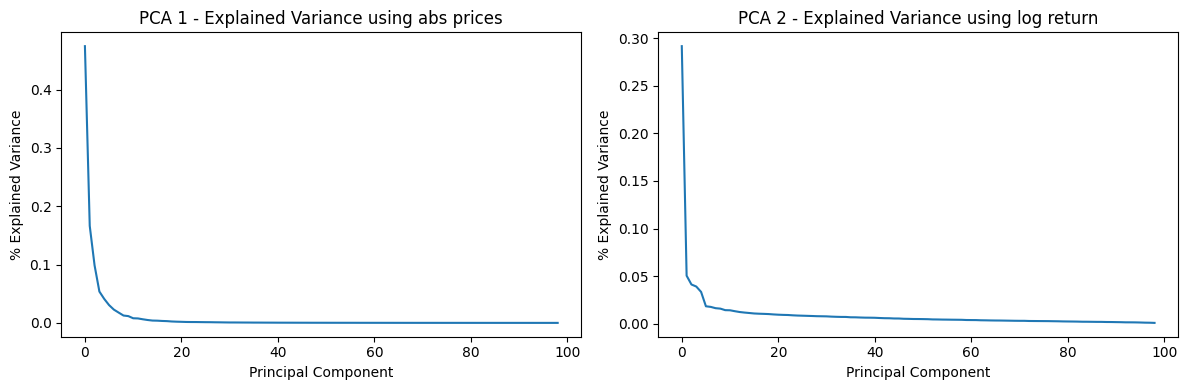

In [17]:
# pca.explained_variance_ratio_ and pca2.explained_variance_ratio_ (absolute vs log return)
explained_variance_1 = pca.explained_variance_ratio_
explained_variance_2 = pca2.explained_variance_ratio_

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first PCA - abs
axes[0].plot(explained_variance_1)
axes[0].set_title('PCA 1 - Explained Variance using abs prices')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('% Explained Variance')

# Plot the second PCA - log
axes[1].plot(explained_variance_2)
axes[1].set_title('PCA 2 - Explained Variance using log return')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('% Explained Variance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

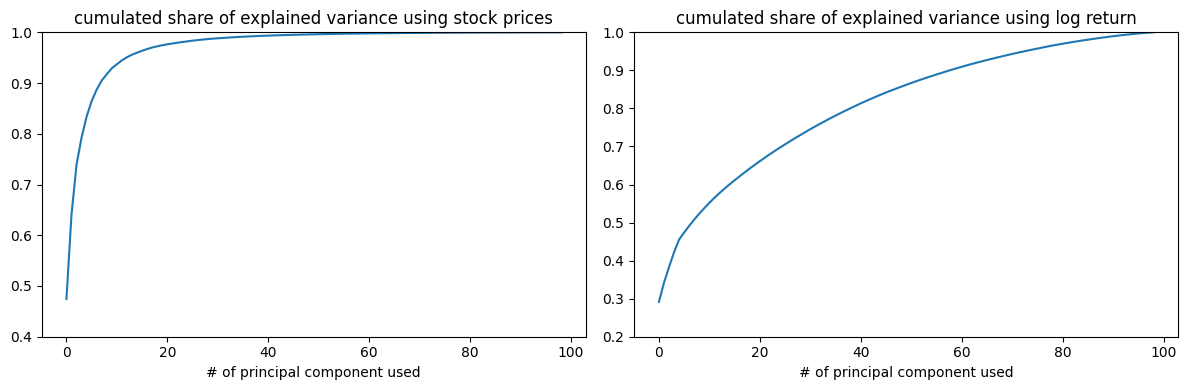

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# first PCA - ABS
axes[0].plot(np.cumsum(explained_variance_1))
axes[0].set_title('cumulated share of explained variance using stock prices')
axes[0].set_xlabel('# of principal component used')

# second PCA - log
axes[1].plot(np.cumsum(explained_variance_2))
axes[1].set_title('cumulated share of explained variance using log return')
axes[1].set_xlabel('# of principal component used')

# Adjust the y-axis scale
axes[0].set_ylim(0.4, 1.0)  # Adjust scale for subplot 1
axes[1].set_ylim(0.2, 1.0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Picking stocks most closely mimicking the index (based on log returns method)

# Keeping only PC1 and PC2
T_log = T_log.iloc[:, :4]

# adding column showing cum PC1+PC2
T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]

# Sort by PC_sum
T_log_sorted = T_log.sort_values("PC_sum", ascending=False)
T_log_sorted = T_log_sorted.reset_index()
T_log_sorted.rename(columns={T_log_sorted.columns[0]: "Stocks" }, inplace = True)

# Calculate the sum of 'PC_sum' for the top 5 rows
top_5_sum = T_log_sorted["PC_sum"].head(5).sum()

# Add the 'pf_weights' column by dividing each stock's 'PC_sum' by the top 5 sum
T_log_sorted["pf_weights"] = T_log_sorted["PC_sum"] /top_5_sum
# Set weights to 0 for rows beyond the top 5
T_log_sorted.loc[5:, "pf_weights"] = 0

T_log_sorted.head(10)

/tmp/ipykernel_193000/1455366988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]


,Stocks,PC1,PC2,PC3,PC4,PC_sum,pf_weights
0,HLMA,0.117053,0.103774,0.110943,0.138163,0.469934,0.219340
1,DPLM,0.120589,0.084592,0.123986,0.116007,0.445175,0.207784
2,SPX,0.118151,0.073121,0.138854,0.098127,0.428254,0.199886
3,EXPN,0.116525,0.107440,0.054858,0.139744,0.418568,0.195365
4,SGE,0.082109,0.077061,0.063120,0.158268,0.380557,0.177624
5,SMT,0.125202,-0.018412,0.143994,0.116656,0.367440,0.000000
6,HWDN,0.133664,0.076577,0.138581,-0.019924,0.328898,0.000000
7,CRDA,0.104173,0.096136,0.088289,0.031002,0.319601,0.000000
8,AUTO,0.119262,0.097290,0.051555,0.048228,0.316336,0.000000
9,RMV,0.106104,0.100018,0.081001,0.019268,0.306390,0.000000


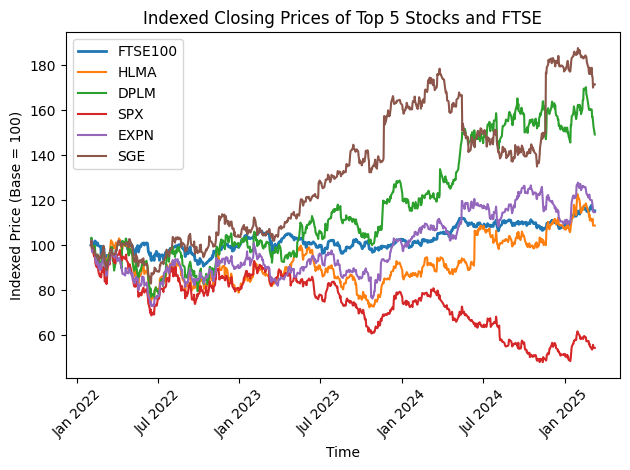

In [20]:
import matplotlib.dates as mdates
# Index the data by dividing each stock's prices by its first value
indexed_data = df / df.iloc[0] * 100

# Retrieve the top 5 stocks from the "Stocks" column of T_log_sorted
top_5_stocks = T_log_sorted["Stocks"].head(5)

# Plot the FTSE index
plt.plot(indexed_data["FTSE100"], label="FTSE100", linewidth=2)

# Plot each of the top 5 stocks dynamically
for stock in top_5_stocks:
    if stock in indexed_data.columns:  # Ensure the stock is in the data
        plt.plot(indexed_data[stock], label=stock)

# Add a legend to distinguish the lines
plt.legend()

# Format the dates on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show dates every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"

# Add titles and labels
plt.title("Indexed Closing Prices of Top 5 Stocks and FTSE")
plt.xlabel("Time")
plt.ylabel("Indexed Price (Base = 100)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


(array([18993., 19113., 19236., 19358., 19478., 19601., 19723., 19844.,
        19967., 20089., 20209.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

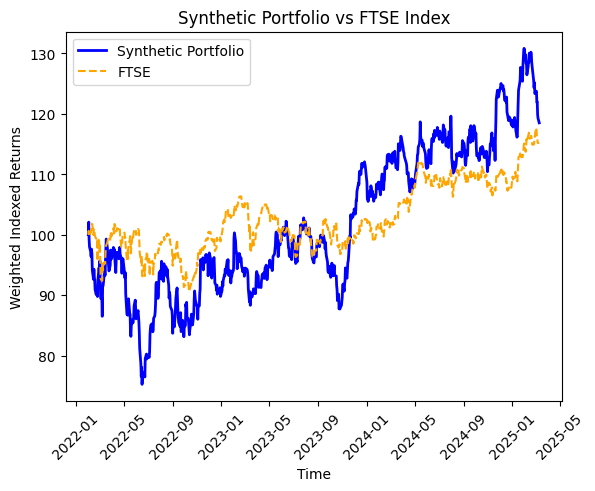

In [22]:
# Extract the top 5 stocks and their weights to make a replicating portfolio
top_5_stocks = T_log_sorted["Stocks"].head(5)
top_5_weights = T_log_sorted["pf_weights"].head(5)

# Calculate the weighted sumproduct (dot product of weights and indexed returns)
weighted_returns = (indexed_data[top_5_stocks] * top_5_weights.values).sum(axis=1)

# Plot the weighted returns
plt.plot(weighted_returns, label="Synthetic Portfolio", color="blue", linewidth=2)

# Plot the FTSE index for comparison
plt.plot(indexed_data["FTSE100"], label="FTSE", color="orange", linestyle="--")

# Add legend, labels, and title
plt.legend()
plt.title("Synthetic Portfolio vs FTSE Index")
plt.xlabel("Time")
plt.ylabel("Weighted Indexed Returns")
plt.xticks(rotation=45)

# Show the plot

In [23]:
window = 100 # n of trading days
dates = X_log.index[window:]  # Align dates with the end of each rolling window

# Placeholder for summed PCs for all stocks (full data)
summed_pcs_full = {}

def rolling_pca(window_start):
    pca_roll = PCA()
    # Create the rolling window data excluding today's data
    window_data = X_log.iloc[window_start:window_start + window - 1, :]  # Exclude today's row
    # Fit PCA to the rolling window
    pca_roll.fit(window_data)
    # Extract loadings (components matrix)
    loadings_matrix = pca_roll.components_.T  # Transpose to get stocks as rows

    # Sum the first 4 PCs for each stock
    summed_values = loadings_matrix[:, :4].sum(axis=1)  # Sum across the first 4 PCs
    summed_pcs_full[dates[window_start]] = pd.Series(summed_values, index=X_log.columns)  # Store as Series

# Iterate through rolling windows
for start in range(len(X_log) - window):
    rolling_pca(start)

# Combine results into a full DataFrame (dates as rows, stocks as columns)
summed_pcs_full_df = pd.DataFrame(summed_pcs_full).T  # Transpose to align dates as rows
summed_pcs_full_df.index.name = "Date"  # Set index name

In [24]:
# Placeholder for daily portfolio weights
daily_portfolio = []

# Loop through each date
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top 10 stocks for this date
    top10_stocks = daily_values.nlargest(10)  # Top 10 stocks by summed PCs

    # Normalize the summed PCs to use as portfolio weights
    portfolio_weights = top10_stocks / top10_stocks.sum()  # calc weights

    # Store the portfolio details (date, stocks, weights)
    portfolio_details = {
        "Date": date,
        "Stocks": list(top10_stocks.index),
        "Weights": list(portfolio_weights.values)
    }
    daily_portfolio.append(portfolio_details)

# Convert to a structured DataFrame
daily_portfolio_df = pd.DataFrame(daily_portfolio)

print("Daily Portfolio with Stocks and Weights:")
print(daily_portfolio_df.head(10))


Daily Portfolio with Stocks and Weights:
        Date                                             Stocks  \
0 2022-06-29  [CCH, IAG, MNDI, EZJ, LLOY, WTB, MNG, RR, NXT,...   
1 2022-06-30  [CCH, IAG, MNDI, LLOY, WTB, EZJ, MNG, RR, NWG,...   
2 2022-07-01  [SHEL, BP, GLEN, WEIR, RIO, IHG, AAL, ANTO, IM...   
3 2022-07-04  [SHEL, BP, GLEN, WEIR, RIO, AAL, ANTO, IHG, IM...   
4 2022-07-05  [SHEL, BP, GLEN, RIO, WEIR, AAL, ANTO, IHG, IM...   
5 2022-07-06  [SHEL, BP, GLEN, RIO, WEIR, AAL, ANTO, IHG, IM...   
6 2022-07-07  [HLMA, SMT, DPLM, HWDN, SPX, AHT, CRDA, SGE, R...   
7 2022-07-08  [HLMA, SMT, DPLM, HWDN, SPX, AHT, CRDA, RMV, S...   
8 2022-07-11  [HLMA, SMT, DPLM, HWDN, SPX, AHT, RMV, SGE, CR...   
9 2022-07-12  [HLMA, SMT, DPLM, HWDN, SPX, AHT, RMV, SGE, CR...   

                                             Weights  
0  [0.11137439505077297, 0.11056032171238397, 0.1...  
1  [0.11137388444454652, 0.1091437013803443, 0.10...  
2  [0.14159103622314312, 0.13181135279123393, 0.1...  
3

In [25]:
daily_portfolio_df

,Date,Stocks,Weights
0,2022-06-29,"[CCH, IAG, MNDI, EZJ, LLOY, WTB, MNG, RR, NXT,...","[0.11137439505077297, 0.11056032171238397, 0.1..."
1,2022-06-30,"[CCH, IAG, MNDI, LLOY, WTB, EZJ, MNG, RR, NWG,...","[0.11137388444454652, 0.1091437013803443, 0.10..."
2,2022-07-01,"[SHEL, BP, GLEN, WEIR, RIO, IHG, AAL, ANTO, IM...","[0.14159103622314312, 0.13181135279123393, 0.1..."
3,2022-07-04,"[SHEL, BP, GLEN, WEIR, RIO, AAL, ANTO, IHG, IM...","[0.1417904227360128, 0.1313120422574738, 0.110..."
4,2022-07-05,"[SHEL, BP, GLEN, RIO, WEIR, AAL, ANTO, IHG, IM...","[0.14053481752301758, 0.1297496776077724, 0.11..."
...,...,...,...
680,2025-03-04,"[CTEC, DCC, PSH, FCIT, ALW, SMT, DPLM, BARC, H...","[0.1569587163043084, 0.14417777203078186, 0.11..."
681,2025-03-05,"[CTEC, DCC, BA, PSH, FCIT, ALW, ICG, DPLM, SMT...","[0.15415169462264106, 0.13833124536880964, 0.1..."
682,2025-03-06,"[CTEC, DCC, SN, BA, AUTO, SSE, SVT, RMV, NG, TW]","[0.2001156330290454, 0.14710223005178055, 0.12..."
683,2025-03-07,"[CTEC, DCC, SN, BA, SSE, AUTO, TW, NG, SVT, SGRO]","[0.2022113753318589, 0.15804903657313307, 0.12..."


In [26]:
# Placeholder for daily weights across all stocks
daily_weights = []

# Loop through each date in the summed PCs DataFrame
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top 10 stocks for this date
    top10_stocks = daily_values.nlargest(10)  # Top 10 stocks by summed PCs

    # calc stock weights
    portfolio_weights = top10_stocks / top10_stocks.sum()

    # Create a row of weights with 0 for stocks not in the top 10
    row_weights = pd.Series(0, index=summed_pcs_full_df.columns)  # Initialize with zeros
    row_weights[top10_stocks.index] = portfolio_weights

    # Add the row of weights to the daily weights list
    daily_weights.append(row_weights)

# Create df
daily_weights_df = pd.DataFrame(daily_weights, index=summed_pcs_full_df.index)

print("Daily Weights Matrix (All Stocks, Top 10 Weighted):")
print(daily_weights_df.head(10))

Daily Weights Matrix (All Stocks, Top 10 Weighted):
source_file  AAF       AAL  ABF  ADM       AHT  ALW      ANTO      AUTO   AV  \
Date                                                                           
2022-06-29   0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0   
2022-06-30   0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0   
2022-07-01   0.0  0.085864  0.0  0.0  0.000000  0.0  0.084805  0.000000  0.0   
2022-07-04   0.0  0.089295  0.0  0.0  0.000000  0.0  0.088679  0.000000  0.0   
2022-07-05   0.0  0.090759  0.0  0.0  0.000000  0.0  0.090481  0.000000  0.0   
2022-07-06   0.0  0.091564  0.0  0.0  0.000000  0.0  0.090867  0.000000  0.0   
2022-07-07   0.0  0.000000  0.0  0.0  0.092198  0.0  0.000000  0.084100  0.0   
2022-07-08   0.0  0.000000  0.0  0.0  0.091666  0.0  0.000000  0.085414  0.0   
2022-07-11   0.0  0.000000  0.0  0.0  0.090820  0.0  0.000000  0.085305  0.0   
2022-07-12   0.0  0.000000  0.0  0.0  0.091534  0.0  0.000000  0.084

In [27]:
daily_weights_df

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-29,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.098267
2022-06-30,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.097668
2022-07-01,0.0,0.085864,0.0,0.0,0.0,0.000000,0.084805,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.102958,0.0,0.075895
2022-07-04,0.0,0.089295,0.0,0.0,0.0,0.000000,0.088679,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.101664,0.0,0.071660
2022-07-05,0.0,0.090759,0.0,0.0,0.0,0.000000,0.090481,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.101234,0.0,0.069668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,0.0,0.000000,0.0,0.0,0.0,0.090466,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2025-03-05,0.0,0.000000,0.0,0.0,0.0,0.084868,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2025-03-06,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.079658,0.0,0.0,...,0.067042,0.0,0.062913,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [114]:
pca_date = '2024-03-07'

# Filter stocks with values > 0 on the specific date
filtered_columns = daily_weights_df.loc[pca_date][daily_weights_df.loc[specific_date] > 0].index
rep_pf = daily_weights_df.loc[[pca_date], filtered_columns]

In [115]:
rep_pf

source_file,AAL,AHT,ANTO,CRDA,EDV,FRES,GLEN,RIO,STAN,VOD
Date,,,,,,,,,,
2024-03-07,0.156109,0.066631,0.096918,0.06777,0.131395,0.097298,0.124974,0.094657,0.095909,0.068338


In [116]:
rep_pf_log_returns_daily = log_returns[rep_pf.columns]

In [118]:
# to show replication backwards, not backtest
rep_pf_results = rep_pf_log_returns_daily.loc[:pca_date].mul(rep_pf.iloc[0], axis=1)
rep_pf_results["total_rep_pf"] = rep_pf_results.sum(axis=1)
rep_pf_results

source_file,AAL,AHT,ANTO,CRDA,EDV,FRES,GLEN,RIO,STAN,VOD,total_rep_pf
date,,,,,,,,,,,
2022-02-02,-0.000422,0.001122,-0.005680,0.001573,0.000389,-0.001936,0.001069,0.000088,0.001154,0.002290,-0.000354
2022-02-03,-0.000259,-0.002932,-0.001944,-0.003269,0.000000,-0.002100,0.000313,0.000335,0.000485,0.000648,-0.008723
2022-02-04,0.000306,-0.001966,-0.002457,-0.000698,0.001161,0.000187,0.000607,-0.000123,0.000035,0.000327,-0.002622
2022-02-07,0.002817,-0.000924,0.000512,-0.000776,0.003423,0.000249,0.001713,0.002592,0.002288,0.001600,0.013494
2022-02-08,0.004839,0.000404,0.000666,-0.001870,0.002233,0.000434,0.001840,0.001718,0.000505,-0.000090,0.010679
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,0.005394,0.000491,-0.000027,0.001851,0.004955,0.001736,0.002409,0.000890,0.003276,0.001312,0.022288
2024-03-04,-0.005265,0.000070,0.001114,-0.001483,0.004296,0.002589,-0.000737,-0.000686,-0.001173,-0.000947,-0.002224
2024-03-05,0.000128,-0.006546,-0.003244,-0.001733,0.005456,0.003532,0.001681,-0.001198,0.000756,0.000773,-0.000395


In [119]:
# Calculate log returns FTSE100
FTSE_log_return = np.log(df["FTSE100"] / df["FTSE100"].shift(1)).loc[:pca_date]


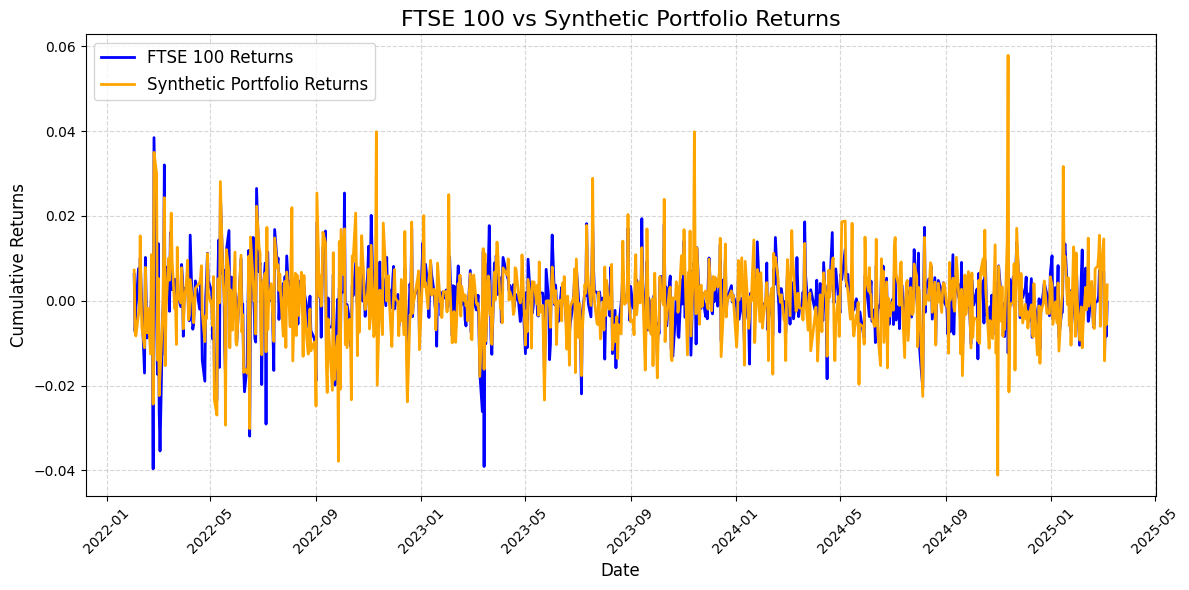

In [88]:
# Assuming FTSE_return and rep_pf_results["total_rep_pf"] are pandas Series with datetime indices
plt.figure(figsize=(12, 6))

# Plot FTSE returns
plt.plot(FTSE_log_return, label="FTSE 100 Returns", color="blue", linewidth=2)

# Plot Synthetic Portfolio returns
plt.plot(rep_pf_results["total_rep_pf"], label="Synthetic Portfolio Returns", color="orange", linewidth=2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels
plt.title("FTSE 100 vs Synthetic Portfolio Returns", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)

# Format x-axis for dates
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


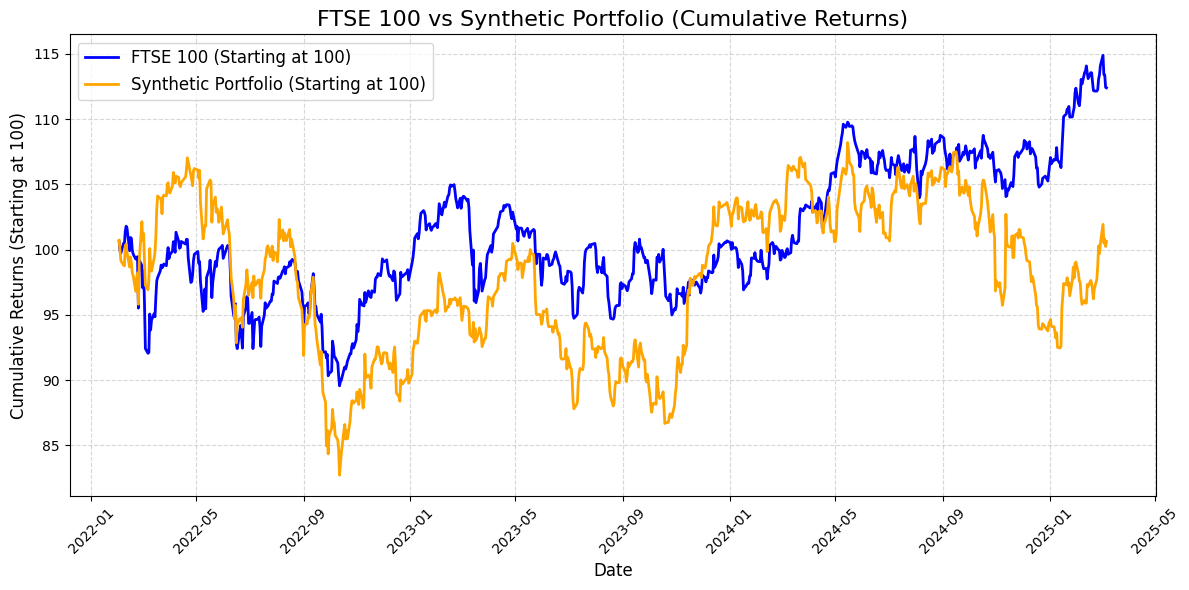

In [89]:
# Convert daily returns to cumulative returns starting at 100
FTSE_cumulative = (FTSE_log_return + 1).cumprod() * 100  # Convert to cumulative returns
rep_pf_cumulative = (rep_pf_results["total_rep_pf"] + 1).cumprod() * 100  # Convert to cumulative returns

# Plot the cumulative returns
plt.figure(figsize=(12, 6))

# Plot FTSE cumulative returns
plt.plot(FTSE_cumulative, label="FTSE 100 (Starting at 100)", color="blue", linewidth=2)

# Plot Synthetic Portfolio cumulative returns
plt.plot(rep_pf_cumulative, label="Synthetic Portfolio (Starting at 100)", color="orange", linewidth=2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels
plt.title("FTSE 100 vs Synthetic Portfolio (Cumulative Returns)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns (Starting at 100)", fontsize=12)

# Format x-axis for dates
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [90]:
FTSE_cumulative

date
2022-02-01           NaN
2022-02-02    100.624393
2022-02-03     99.902588
2022-02-04     99.737913
2022-02-07    100.492732
                 ...    
2025-03-03    114.895073
2025-03-04    113.431358
2025-03-05    113.389907
2025-03-06    112.440575
2025-03-07    112.403022
Name: FTSE100, Length: 785, dtype: float64

In [91]:
rep_pf_cumulative

date
2022-02-02    100.720786
2022-02-03     99.969025
2022-02-04     99.140110
2022-02-07     98.823058
2022-02-08     98.763136
                 ...    
2025-03-03    101.943567
2025-03-04    100.501265
2025-03-05    100.812118
2025-03-06    100.246924
2025-03-07    100.622533
Name: total_rep_pf, Length: 784, dtype: float64

In [124]:
spread_df = pd.merge(rep_pf_cumulative, FTSE_cumulative, on='date', how='inner') 
spread_df["spread"] = spread_df["FTSE100"] - spread_df["total_rep_pf"]
spread_df

,total_rep_pf,FTSE100,spread
date,,,
2022-02-02,100.720786,100.624393,-0.096393
2022-02-03,99.969025,99.902588,-0.066437
2022-02-04,99.140110,99.737913,0.597803
2022-02-07,98.823058,100.492732,1.669674
2022-02-08,98.763136,100.407776,1.644640
...,...,...,...
2025-03-03,101.943567,114.895073,12.951507
2025-03-04,100.501265,113.431358,12.930093
2025-03-05,100.812118,113.389907,12.577789


In [101]:
spread_df["z_score"] = z_scores

In [ ]:
#long if z score = less - 0.5     but not smaller than - 2   ;   short if over 0.5 but less then 2

In [ ]:
# Backtesting : calculate z score on rolling basis of past 60 days (t 1 is the pca input, and then calc returns post t1 based on z score strategy)    -1: short rep, long ftse



In [129]:
end_date = pd.to_datetime(pca_date) + pd.Timedelta(days=100)

# Filter the DataFrame to include only the target date range
target_df = spread_df.loc[pca_date:end_date]

# Function to calculate rolling z-scores using scipy.stats.zscore
def rolling_z_score(series):
    if len(series) == 0 or series.std() == 0:  # Handle cases with no variance
        return 0
    return zscore(series)[-1]  # Get the z-score of the last element in the rolling window

# Calculate rolling z-score (exclude today's value using closed='left')
spread_df['z_score'] = (
    spread_df['spread']
    .rolling(window=60, min_periods=60, closed='left')  # Rolling window excluding the current day
    .apply(lambda x: rolling_z_score(x), raw=False)
)

# Apply the calculation only for the specified date range
rolling_z_score = spread_df.loc[pca_date:end_date]

In [132]:
# Create a trade signal based on the new thresholds
rolling_z_score['trade_signal'] = np.where(
    rolling_z_score['z_score'] < -2, 1,  # Open a long position (sbo - S-score buy open)
    np.where(
        rolling_z_score['z_score'] > 2, -1,  # Open a short position (sso - S-score sell open)
        np.where(
            (rolling_z_score['z_score'] > -0.5) & (rolling_z_score['z_score'] < 0.75), 0,  # Close positions (ssc and sbc)
            np.nan  # Hold position (no action)
        )
    )
)

# Fill NaN values with the previous signal (holding position)
rolling_z_score['trade_signal'] = rolling_z_score['trade_signal'].fillna(method='ffill')

# Display the first 20 rows of the DataFrame with the trade signals
rolling_z_score.head(20)

/tmp/ipykernel_193000/1914536901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['trade_signal'] = np.where(
/tmp/ipykernel_193000/1914536901.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['trade_signal'] = rolling_z_score['trade_signal'].fillna(method='ffill')


,total_rep_pf,FTSE100,spread,z_score,trade_signal
date,,,,,
2024-03-07,105.714586,100.074523,-5.640063,-1.560316,NaN
2024-03-08,106.456073,99.646906,-6.809168,-2.385526,1.0
2024-03-11,106.192397,99.770417,-6.421980,-3.254441,1.0
2024-03-12,106.030983,100.787733,-5.243249,-2.651377,1.0
2024-03-13,106.214628,101.104649,-5.109979,-1.508111,1.0
2024-03-14,106.398436,100.726697,-5.671739,-1.339654,1.0
2024-03-15,106.218990,100.520950,-5.698040,-1.759563,1.0
2024-03-18,106.020706,100.458493,-5.562213,-1.704898,1.0
2024-03-19,105.540446,100.662513,-4.877933,-1.526311,1.0


In [ ]:
rolling_z_score["strategy_return"] = 

# Predicting Spread with LSTM / NN

In [30]:
import yfinance as yf

# 10-year Treasury yield (^TNX)
X_df = yf.download("^TNX", start="2022-06-29", end="2025-03-10")
print(X_df)


[*********************100%***********************]  1 of 1 completed

Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2022-06-29  3.093  3.187  3.093  3.149      0
2022-06-30  2.972  3.041  2.972  3.035      0
2022-07-01  2.889  2.932  2.791  2.932      0
2022-07-05  2.809  2.871  2.780  2.871      0
2022-07-06  2.913  2.924  2.746  2.784      0
...           ...    ...    ...    ...    ...
2025-03-03  4.180  4.256  4.170  4.254      0
2025-03-04  4.210  4.218  4.106  4.134      0
2025-03-05  4.265  4.284  4.185  4.231      0
2025-03-06  4.286  4.344  4.267  4.277      0
2025-03-07  4.317  4.328  4.211  4.251      0

[675 rows x 5 columns]


In [31]:
X_df

Price,Close,High,Low,Open,Volume
Ticker,^TNX,^TNX,^TNX,^TNX,^TNX
Date,,,,,
2022-06-29,3.093,3.187,3.093,3.149,0
2022-06-30,2.972,3.041,2.972,3.035,0
2022-07-01,2.889,2.932,2.791,2.932,0
2022-07-05,2.809,2.871,2.780,2.871,0
2022-07-06,2.913,2.924,2.746,2.784,0
...,...,...,...,...,...
2025-03-03,4.180,4.256,4.170,4.254,0
2025-03-04,4.210,4.218,4.106,4.134,0
